{3: 0.44000000000000006, 5: 0.52, 7: 0.44000000000000006, 10: 0.44000000000000006, 20: 0.32, 25: 0.32}
{3: 0.44000000000000006, 5: 0.52, 7: 0.44000000000000006, 10: 0.44000000000000006, 20: 0.32, 25: 0.32}
Number of trees 3 ----> Accuracy Score = 0.44000000000000006
Number of trees 5 ----> Accuracy Score = 0.52
Number of trees 7 ----> Accuracy Score = 0.44000000000000006
Number of trees 10 ----> Accuracy Score = 0.44000000000000006
Number of trees 20 ----> Accuracy Score = 0.32
Number of trees 25 ----> Accuracy Score = 0.32


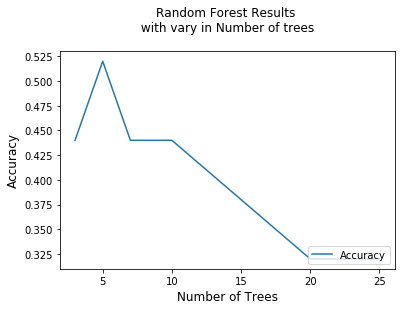

{3: 0.36, 5: 0.36, 9: 0.4, 12: 0.36000000000000004}
{3: 0.36, 5: 0.36, 9: 0.4, 12: 0.36000000000000004}
Maximum Depth 3 ----> Accuracy Score = 0.36
Maximum Depth 5 ----> Accuracy Score = 0.36
Maximum Depth 9 ----> Accuracy Score = 0.4
Maximum Depth 12 ----> Accuracy Score = 0.36000000000000004


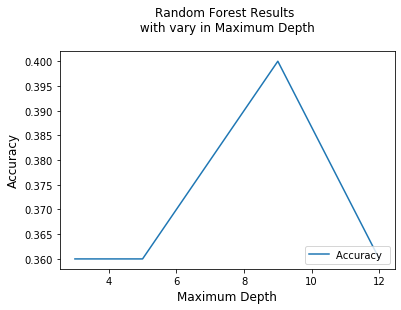

In [4]:
# -*- coding: utf-8 -*-
"""
Random Forest

"""

import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

class RandomForest_Classifier():
    def __init__(self):
        #self.split = [2,3,4,5,7,10]
        self.trees = [10,20,25, 50,100,500]
        self.depth = [3,5,9,12]
    
    def dataset_split(self):
        df = pd.read_csv("dp6.csv")  
        X = df.drop('Y',axis=1)
        y = df.Y
        return X,y

    def random_forest_model_change_in_estimators(self,X,y):    
        acc_score = {}       
        for i in self.trees:    
            kfold = model_selection.KFold(n_splits=5)
            model = RandomForestClassifier(n_estimators=i, criterion='gini')
            results = model_selection.cross_val_score(model, X, y, cv=kfold)
            #accuracy_score = results.mean()
            #acc.append(accuracy_score)
            acc_score[i]=results.mean()
        print(acc_score)

        return acc_score
    
    def random_forest_model_change_in_depth(self,X,y):
    
        acc_score = {}       
        for j in self.depth:    
            kfold = model_selection.KFold(n_splits=5)
            model = RandomForestClassifier(n_estimators=25, max_depth=j, criterion='gini')
            results = model_selection.cross_val_score(model, X, y, cv=kfold)
            #accuracy_score = results.mean()
            #acc.append(accuracy_score)
            acc_score[j]=results.mean()
        print(acc_score)

        return acc_score
    
    def graph(self, ra_tree_est):
        plt.figure()
        names = list(ra_tree_est.keys())
        values = list(ra_tree_est.values())
        plt.plot(names,values)
        plt.title("Random Forest Results \n with vary in Number of trees ", pad=20)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel('Number of Trees', fontsize = "large")
        plt.legend(["Accuracy"], loc='lower right')
        plt.show()
        
        
    def graph2(self, ra_tree_est_depth):
        plt.figure()
        names = list(ra_tree_est_depth.keys())
        values = list(ra_tree_est_depth.values())
        plt.plot(names,values)
        plt.title("Random Forest Results \n with vary in Maximum Depth ", pad=20)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel('Maximum Depth', fontsize = "large")
        plt.legend(['Accuracy '], loc='lower right')
        plt.show()
        



es_cla = RandomForest_Classifier()
X,y = es_cla.dataset_split()


ra_tree_est = es_cla.random_forest_model_change_in_estimators(X,y)
print(ra_tree_est)

for x,y in ra_tree_est.items():
    print("Number of trees {0} ----> Accuracy Score = {1}". format (x, np.mean(ra_tree_est[x])) )
es_cla.graph(ra_tree_est)

ma_cla = RandomForest_Classifier()
X,y = ma_cla.dataset_split()
ra_tree_est_depth = ma_cla.random_forest_model_change_in_depth(X,y)
print(ra_tree_est_depth)

for x,y in ra_tree_est_depth.items():
    print("Maximum Depth {0} ----> Accuracy Score = {1}". format (x, np.mean(ra_tree_est_depth[x])) )
ma_cla.graph2(ra_tree_est_depth)

